In [1]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(150, 150, 3), name='conv_1'))
# 设置第一个卷积层,需要设置输入数据的维度(150, 150, 3)
# 需要训练的数据是彩色图片, 最后一维为3(rgb)
# 32, (3, 3)表示这一个卷积层设置32个3*3的Filter，直观上是寻找32个基础图案
# name表示命名这一个卷积层，便于我们后期查看
model.add(layers.MaxPooling2D((2, 2)))
# 设置2*2的Max Pooling层
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name='conv_3'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name='conv_4'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', # 这里是二元分类问题，所以使用二元的交叉熵
              optimizer=optimizers.RMSprop(lr=1e-4), #优化器使用RMSprop
              metrics=['acc'])

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [2]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 15, 15, 128)      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
# 像素点的值范围是(0, 255) 神经网络更喜欢(0,1)的输入，所以我们使其归一化
val_datagen = ImageDataGenerator(rescale=1./255)
'''
自动的将训练集，验证集中的图片转换为模型输入的数据流
虽然我们可以将所有的图片都转换为输入的数组流储存起来，但是那样会占据很多的空间
我们可以利用模型训练时，每次仅针对一个batch的数据进行运算来调整参数的特性，
利用Python的生成器方法，通过迭代产生输入的数据流
Keras中集成了这种方法，可以直接将图片集转换为符合要求的输入数据流，并采用生成器
的方法产生
'''
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train', # 训练集的目录，子目录有cats和dogs两个目录
    target_size=(150, 150), # 将所有图像的大小调整为150*150
    batch_size=20, # 每一次生成20个数据
    class_mode='binary') # 对应于两个子目录使用二元分类的模式
validation_generator = val_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(train_generator, # 数据的生成器
                              steps_per_epoch=100,
# 数据每次生成20个，每一个epoch数据生成器生成100次，即产生2000条数据，对应训练集中猫狗各1000张
                              epochs=30, # 所有数据训练轮30遍
                              validation_data=validation_generator,
                              validation_steps=50)
# 验证集每次生成20个，50次生成后，即产生1000条验证集的数据，对应训练集中猫狗各500张

model.save('cats_and_dogs_small_1.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Epoch 1/30
100/100 [==============================] - 13s 127ms/step - loss: 0.6909 - acc: 0.5280 - val_loss: 0.6737 - val_acc: 0.5440

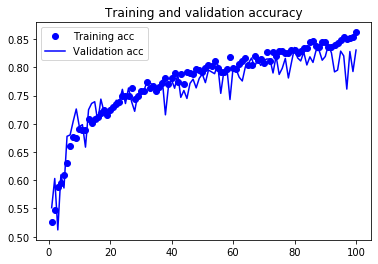

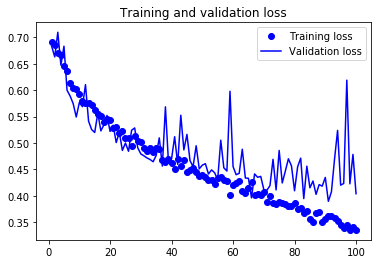

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [2]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, 
                             # 角度值（在 0~180 范围内），表示图像随机旋转的角度范围。
                             width_shift_range=0.2,
                             #是图像在水平或垂直方向上平移的范围（相对于总宽度或总高度的比例）。
                             height_shift_range=0.2,
                             shear_range=0.2, # 随机错切变换的角度
                             zoom_range=0.2, # 图像随机缩放的范围。
                             horizontal_flip=True,
                             # 是随机将一半图像水平翻转。如果没有水平不对称的假设（比如真
                             # 实世界的图像），这种做法是有意义的
                             fill_mode='nearest'
                             # 填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移。
                             )

Using TensorFlow backend.


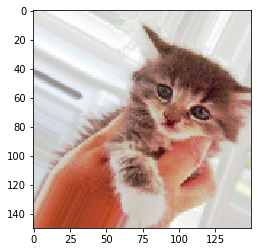

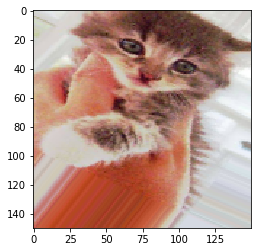

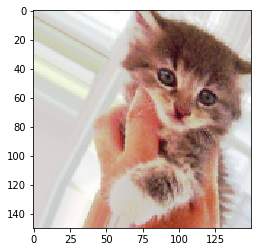

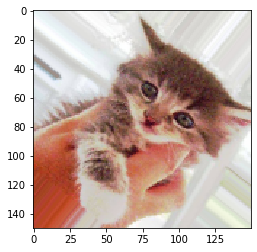

In [5]:
import os
from keras.preprocessing import image # 图像预处理工具的模块

train_cats_dir = r'D:\Projects\guide\rnn\cats_and_dogs_small\train\cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # 选择一张图片进行增强

img = image.load_img(img_path, target_size=(150, 150)) # 读取图像并调整大小
x = image.img_to_array(img) # 将其转换为形状 (150, 150, 3) 的 Numpy 数组
x = x.reshape((1,) + x.shape) # 将其形状改变为 (1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # 使Flatten层上的节点有0.5的概率失活
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255) # 注意，不能增强验证数据
train_generator = train_datagen.flow_from_directory('cats_and_dogs_small/train',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory('cats_and_dogs_small/validation',
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100, # 可根据自己计算机的算力调整迭代次数
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_2.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6912 - acc: 0.5265 - val_loss: 0.6831 - val_acc: 0.5514